In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

Nodes: 34
Edges: 78
Number of communities detected: 3
1 Community: frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
2 Community: frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
3 Community: frozenset({0, 16, 19, 4, 5, 6, 10, 11})
Modularity Score: 0.41096493693896297


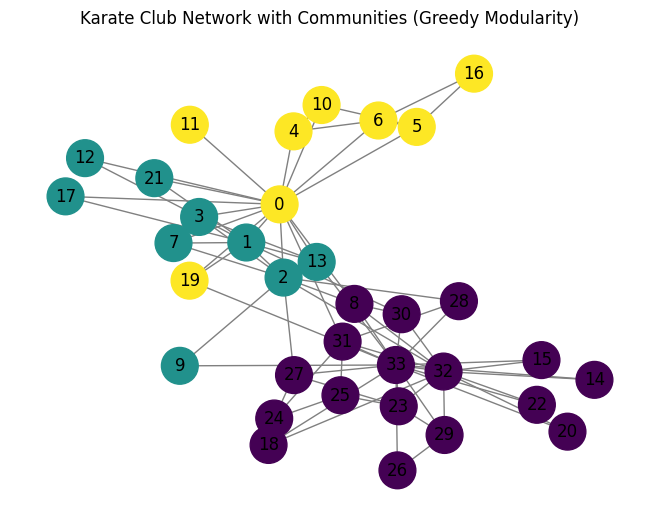

In [3]:
G = nx.karate_club_graph()

nodes = G.number_of_nodes()
edges = G.number_of_edges()

print("Nodes:", nodes)
print("Edges:", edges)

communities = community.greedy_modularity_communities(G)
print("Number of communities detected:", len(communities))

for i , comm in enumerate(communities):
    print(f"{i + 1} Community: {comm}")


modularity_score = community.modularity(G , communities)
print("Modularity Score:", modularity_score)

colors = plt.get_cmap('viridis', len(communities))

node_colors = [''] * nodes

for i,comm in enumerate(communities):
    for node in comm:
        node_colors[node] = colors(i)


nx.draw(G,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        font_color='black',
        node_size=700)
plt.title("Karate Club Network with Communities (Greedy Modularity)")
plt.show()


Number of Nodes: 34
Number of Edges: 78
Number of Detected Communities: 4
Community 1 : {0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}
Community 2 : {16, 4, 5, 6, 10}
Community 3 : {23, 24, 25, 27, 28, 31}
Community 4 : {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}
Modularity Score: 0.44490358126721763


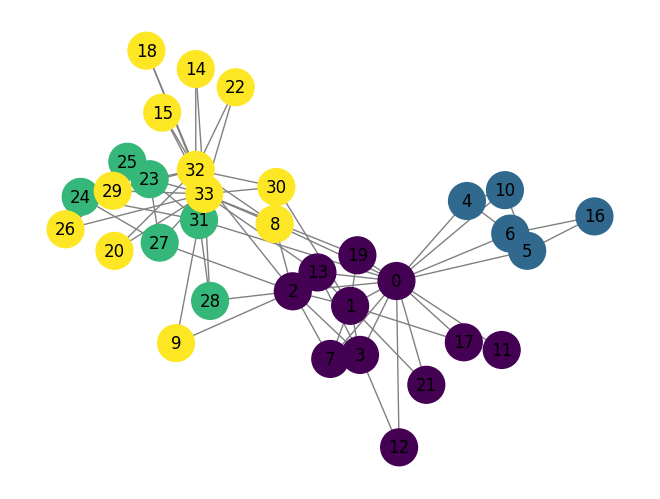

In [4]:
G = nx.karate_club_graph()

nodes = G.number_of_nodes()
edges = G.number_of_edges()

print(f"Number of Nodes: {nodes}")
print(f"Number of Edges: {edges}")

communities_found = community.louvain_communities(G)
print(f"Number of Detected Communities: {len(communities_found)}")

for i , comm in enumerate(communities_found):
    print(f"Community {i + 1} : {comm}")

modularity_score = community.modularity(G , communities_found)
print(f"Modularity Score: {modularity_score}")

colors = plt.get_cmap('viridis' , len(communities_found))

node_colors = [''] * nodes

for i , comm in enumerate(communities_found):
    for node in comm:
        node_colors[node] = colors(i)


nx.draw(G , node_color=node_colors , with_labels=True , edge_color='gray' , font_color='black' , node_size=700)

In [5]:
!pip install cdlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from cdlib import algorithms
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


Infomap Communities: 3
[[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16]]
Computing layout...


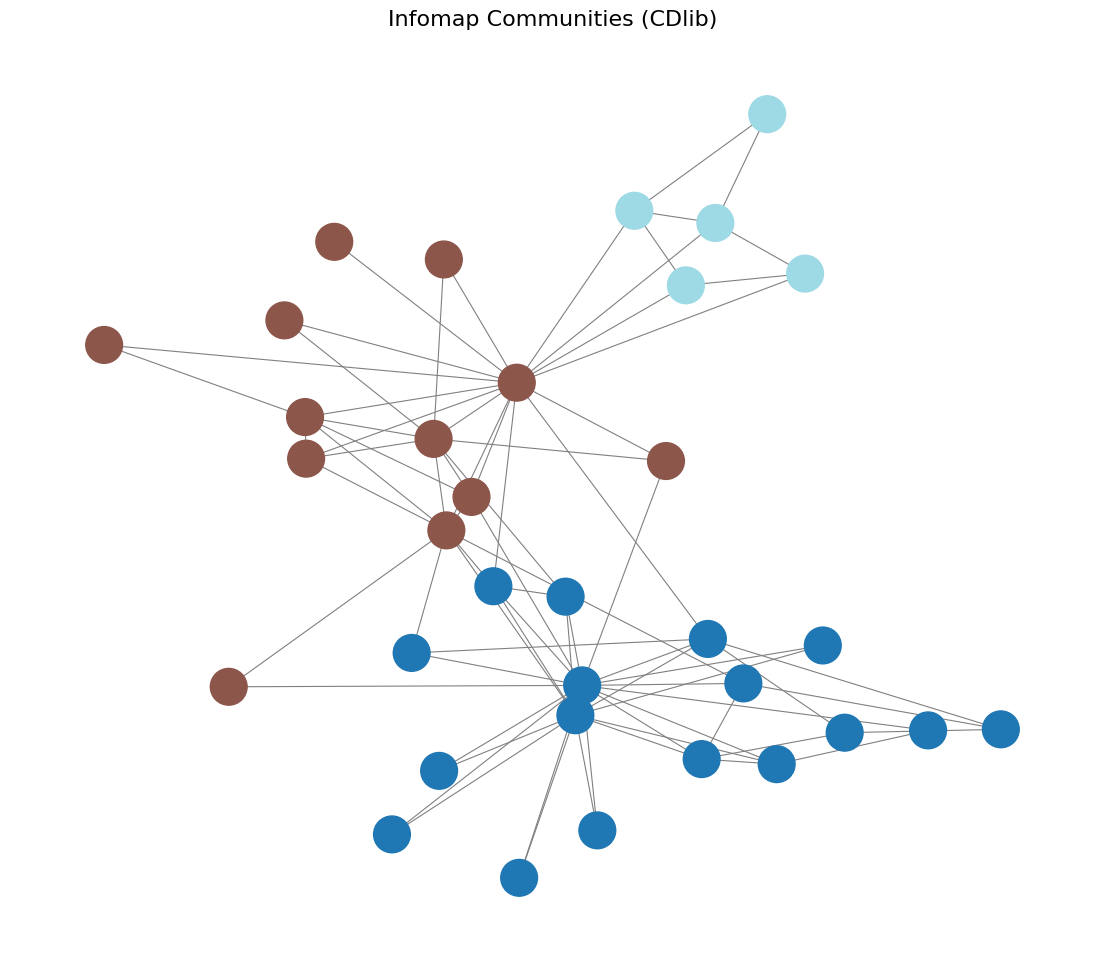

In [7]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

G = nx.karate_club_graph()

infomap_coms = algorithms.infomap(G)
print("Infomap Communities:", len(infomap_coms.communities))

print(infomap_coms.communities)


infomap_comm_map = {}
for cid, community in enumerate(infomap_coms.communities):
    for node in community:
        infomap_comm_map[node] = cid

num_comms = len(infomap_coms.communities)
cmap = cm.get_cmap("tab20", num_comms)
node_colors = [cmap(infomap_comm_map[n]) for n in G.nodes()]

print("Computing layout...")
pos = nx.spring_layout(G, k=0.15, iterations=40, seed=42)

plt.figure(figsize=(14, 12))

nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    cmap=cmap,
    node_size=700,
    alpha=1
)

nx.draw_networkx_edges(
    G,
    pos,
    width=0.8,
    alpha=1,
    edge_color="gray"
)

plt.title("Infomap Communities (CDlib)", fontsize=16)
plt.axis("off")
plt.show()